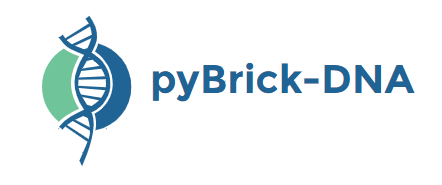

> pyBrick-DNA is an interactive "open source" platform, which uses the Python programming language, in order to **automatically** build genetic expression components for **eukaryotic and prokaryotic** organisms. It also includes the option to build constructions of **CRISPR** (Clustered Regularly Interspaced Short Palindromic Repeats) editing systems for plants. For both cases, the graphic visualization of the genetic set and its download in **GenBank (.gb)** format is available, which allows exporting the sequences together with their annotations for later use on other platforms (ex. SnapGene or Benchling) without the need to carry out this process manually.



**pyBrick-DNA** was developed by:



*   Gladys Cavero Rozas                **ᵃ**
*   Jose Martin Cisneros Mandujano **ᵃ**
*   Yomali Ferreyra Chombo **ᵃ**
*   Daniela Moreno **ᵇ**
*   Yerko Ortiz **ᵇ**
*   Martin Gutierrez **ᵇ**
*   Alberto Donayre Torres **ᵃ**


**ᵃ**     Universidad de Ingenieria y Tecnologia (UTEC) - Lima, Peru (adonayre@utec.edu.pe)

**ᵇ**     Universidad Diego Portales - Santiago, Chile (martin.gutierrez@mail.udp.cl)


# User Instructions

1. **Choose** the organism that you are going to use: **prokaryote** or **eukaryote** (mammals/plants)

2. **Choose** or type your promoter sequence **(constitutive/
inducible)**

    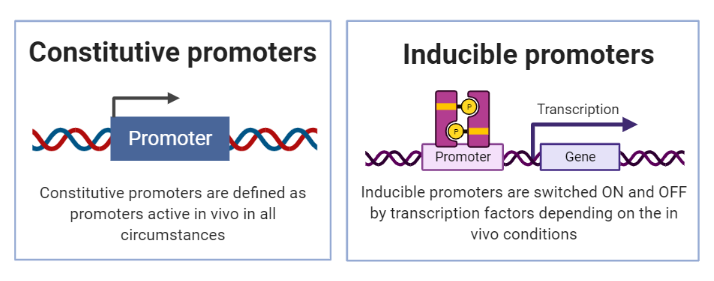

3. **Choose** or type your ribosome binding sequence (RBS) if apply
4. **Type** your gene sequence sequence
5. **Choose** or type your terminator sequence
6. **Download** the .gb file which contains the assembled sequence

## Some tips:

- If you do not find the sequence you want to work with, select the personalized option.
- **Don't forget** to press the **OK button** at every stage.

In [10]:
# @markdown #**[IMPORTANT]**

# @markdown Download packages and libraries before using the program
from __future__ import print_function
!pip install dna_features_viewer
from dna_features_viewer import GraphicFeature, GraphicRecord,CircularGraphicRecord

import ipywidgets as widgets
from ipywidgets import HBox, VBox

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from google.colab import files
from ipywidgets import Button

from matplotlib.offsetbox import FontProperties
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Databases
!gdown --id 1Ci2j_f2zxyPiBavLfaXXzsV-LrWE6IGW #Prokaryote
pro = "db_prokaryote.csv"

!gdown --id 1j7iJ2CjcAwaWxJsf6kKHa79bpCh55k7N #Eukaryote
euk = "db_eukaryote.csv"

!gdown --id 10uL4eKXFOv2RpggWUH6YGFSTuhZBscl7 #Eukaryote Plants
eukplant = "db_eukaryote_plants.csv"

!wget https://raw.githubusercontent.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer/master/docs/_static/images/title.png -O assembly.png


db_proka = {'Regulatory' :{},
            'RBS':{},
            'Terminator':{},
            'CDS':{}
            }

db_euka = {'Regulatory' :{},
            'RBS':{},
            'Terminator':{},
            'CDS':{}
            }

db_euka_plant = {'Regulatory' :{},
            'RBS':{},
            'Terminator':{},
            'CDS':{}
            }


import csv
with open(pro, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row[6]= row[6].upper()
      if row[2] == 'Regulatory':
        db_proka['Regulatory'][row[7]] = [row[0], row[1], row[6]]
      elif row[2] == 'RBS':
        db_proka["RBS"][row[7]] = [row[0], row[1], row[6]]
      elif row[2] == 'Terminator':
        db_proka["Terminator"][row[7]] =   [row[0], row[1], row[6]]
      elif row[2] == 'CDS':
        db_proka["CDS"][row[7]] =   [row[0], row[1], row[6]]

with open(euk, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row[6]= row[6].upper()
      if row[2] == 'Regulatory':
        db_euka['Regulatory'][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'RBS':
        db_euka["RBS"][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'Terminator':
        db_euka["Terminator"][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'CDS':
        db_proka["CDS"][row[7]] =   [row[0], row[1], row[6]]

with open(eukplant, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row[6]= row[6].upper()
      if row[2] == 'Regulatory':
        db_euka_plant['Regulatory'][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'RBS':
        db_euka_plant["RBS"][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'Terminator':
        db_euka_plant["Terminator"][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'CDS':
        db_proka["CDS"][row[7]] =   [row[0], row[1], row[6]]




!gdown --id 186JwRyTyhQQXiD9LK2WJt0msBHJH57cX
database = 'Database.csv'


d1 = {
    'prokaryote': {
        'prom' :{
            'fullpro':{},
            'minpro':{}
            },

        'RBS':{},
        'term':{},
        'CDS':{}
},
    'eukaryote(mammal)' : {
        'prom' :{
            'fullpro':{},
            'minpro':{}
            },

        'RBS':{},
        'term':{},
        'CDS':{}
},
      'eukaryote(plant)':{
        'prom' :{
            'fullpro':{},
            'minpro':{}
            },

        'RBS':{},
        'gene':{},
        'other':{},
        'term':{},
        'CDS':{}
}, 'box':{}

}



import csv
with open(database, 'r') as file:
    reader = csv.reader(file)

    for row in reader:
      row[4]= row[4].upper()
      if row[1] == 'prokaryote':
        if row[3] == 'fullpro':
          d1['prokaryote']['prom']['fullpro'][row[0]] = row[4]
        elif row[3] == 'minpro':
          d1['prokaryote']['prom']['minpro'][row[0]] = row[4]
        elif row[3] == 'RBS':
          d1['prokaryote']['RBS'][row[0]] = row[4]
        elif row[3] == 'terminator':
          d1['prokaryote']['term'][row[0]] = row[4]
        elif row[3] == 'CDS':
          d1['prokaryote']['CDS'][row[0]] = row[4]

      elif row[2] == 'plant':
          if row[3] == 'fullpro':
            d1['eukaryote(plant)']['prom']['fullpro'][row[0]] = row[4]
          elif row[3] == 'minpro':
            d1['eukaryote(plant)']['prom']['minpro'][row[0]] = row[4]
          elif row[3] == 'RBS':
            d1['eukaryote(plant)']['RBS'][row[0]] = row[4]
          elif row[3] == 'terminator':
            d1['eukaryote(plant)']['term'][row[0]] = row[4]
          elif row[3] == 'CDS':
            d1['eukaryote(plant)']['CDS'][row[0]] = row[4]

          elif row[3] == 'gene':
            d1['eukaryote(plant)']['gene'][row[0] ] = row[4]

          elif row[3] == 'other':
            d1['eukaryote(plant)']['other'][row[0] ] = row[4]


      elif row[2] == 'mammal':
        if row[3] == 'fullpro':
            d1['eukaryote(mammal)']['prom']['fullpro'][row[0]] = row[4]
        elif row[3] == 'minpro':
          d1['eukaryote(mammal)']['prom']['minpro'][row[0]] = row[4]
        elif row[3] == 'RBS':
          d1['eukaryote(mammal)']['RBS'][row[0]] = row[4]
        elif row[3] == 'terminator':
          d1['eukaryote(mammal)']['term'][row[0]] = row[4]
        elif row[3] == 'CDS':
          d1['eukaryote(mammal)']['CDS'][row[0]] = row[4]


      if row[3] == 'box':
        d1['box'][row[0]] = row[4]

# Read Fasta

import io
import pandas as pd
from io import StringIO
from Bio import SeqIO

def fasta_read(upload_tab):
  #convert dic to str
  prueba = list(upload_tab.value.values())[0]
  content= prueba['content'].decode('utf-8')

  #convert string to fasta
  fasta_string = content

  fasta_io = StringIO(fasta_string)

  records = SeqIO.parse(fasta_io, "fasta")

  for rec in records:
      name=rec.name
      description=rec.description
      sequence=rec.seq

  fasta_io.close()
  return description, str(sequence)

#random color
import random

def generate_color():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)

    color_hex = '#{:02X}{:02X}{:02X}'.format(r, g, b)

    return color_hex


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ci2j_f2zxyPiBavLfaXXzsV-LrWE6IGW
To: /content/db_prokaryote.csv
100% 292k/292k [00:00<00:00, 90.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1j7iJ2CjcAwaWxJsf6kKHa79bpCh55k7N
To: /content/db_eukaryote.csv
100% 100k/100k [00:00<00:00, 61.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google

In [ ]:
# @markdown # Run to show widget
# @markdown Select the components and do not forget to press OK

db = None
RBS_name = ""
RBS_seq = ""
RBS_type = ""
promoter_name =""
promoter_seq = ""
promoter_type =""
terminator_name =""
terminator_seq = ""
terminator_type =""
gene_names = {}
gene_sequences = {}
gene_uploads = {}
gene_map = {}
gene_number = 0
names = []
sequences = []
types = []
colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']
fig, ax = plt.subplots(figsize=(9, 3))
plt.gca().xaxis.set_visible(False)
plt.close(fig)

def getFigure():
  global ax
  global record
  global colors
  global names, sequences, types
  ax.clear()

  names = []
  sequences = []
  types = []

  if(promoter_name != "" and promoter_seq != ""):
    names.append(promoter_name)
    sequences.append(promoter_seq)
    types.append(promoter_type)

  if(RBS_name != "" and RBS_seq != ""):
    names.append(RBS_name)
    sequences.append(RBS_seq)
    types.append(RBS_type)

  for key in gene_map:
    element = gene_map[key]
    if(element[0] != "" and element[1] != ""):
      names.append(element[0])
      sequences.append(element[1])
      types.append(element[2])

  if(terminator_name != ""):
    names.append(terminator_name)
    sequences.append(terminator_seq)
    types.append(terminator_type)

  if( len(colors) <= len(names)):
    colors.append(generate_color())

  length = []
  for i in sequences:
    length.append(len(i))

  features = []
  ginitio = 0

  for i in range(len(names)):
    gfinal =  ginitio + len(sequences[i]) -1
    features= features + [GraphicFeature(start = ginitio,
                              end = gfinal,
                              strand = + 1,
                              color = colors[i],
                              label = str(types[i])+": " + names[i])]
    ginitio = gfinal
  if(len(features) != 0):
    record = GraphicRecord(sequence_length=sum(length), features=features)
    axr, _ = record.plot(ax)
    axr.figure.savefig('assembly.png', bbox_inches='tight')
    file= open("assembly.png", "rb")
    image = file.read()
    fileImg.value = image
    fileImg.layout.visibility = "visible"

def add_btn_clicked(b):
  global gene_number
  gene_number += 1
  result = line()
  result[1].options = gene_dropdown_list[0].options
  gene_dropdown_list.append(result[1])
  input_box.children += (result[0],)

def delete_btn_clicked(b):
  global gene_map, gene_number
  id = getattr(b, 'id', None)
  if gene_number > 0:
    if id in gene_map:
      gene_map.pop(id)
    input_box.children = tuple(child for child in input_box.children if getattr(child, 'id', None) !=  id)
    getFigure()

def handle_promoter_dropdown_button(b):
  global db, promoter_name, promoter_seq, promoter_type
  if(promoter_dropdown.value != None):
    promoter_name = promoter_dropdown.value
    promoter_seq = db['Regulatory'][promoter_dropdown.value][2]
    promoter_type = 'regulatory'
    getFigure()

def handle_promoter_custom_button(b):
  global db, promoter_name, promoter_seq, promoter_type
  if(promoter_custom_name.value.strip() != "" and promoter_custom_seq.value.strip() != ""):
    promoter_name = promoter_custom_name.value
    promoter_seq = promoter_custom_seq.value
    promoter_type = 'regulatory'
    getFigure()

def handle_promoter_upload_button(b):
  global db, promoter_name, promoter_seq, promoter_type
  if(len(promoter_upload.value) != 0):
    p, q = fasta_read(promoter_upload)
    promoter_name = p
    promoter_seq = q
    promoter_type = 'regulatory'
    getFigure()

def handle_RBS_dropdown_button(b):
  global db, RBS_name, RBS_seq, RBS_type
  if(RBS_dropdown.value != None):
    RBS_name = RBS_dropdown.value
    RBS_seq = db['RBS'][RBS_dropdown.value][2]
    RBS_type = 'misc_feature'
    getFigure()

def handle_RBS_custom_button(b):
  global db, RBS_name, RBS_seq, RBS_type
  if(RBS_custom_name.value.strip() != "" and RBS_custom_seq.value.strip()):
    RBS_name = RBS_custom_name.value
    RBS_seq = RBS_custom_seq.value
    RBS_type = 'misc_feature'
    getFigure()

def handle_RBS_upload_button(b):
  global db, RBS_name, RBS_seq, RBS_type
  if(len(RBS_upload.value) != 0):
    n, m = fasta_read(RBS_upload)
    RBS_name = n
    RBS_seq = m
    RBS_type = 'misc_feature'
    getFigure()

def handle_gene_dropdown_button(b):
  global db, gene_dropdown_list, gene_map
  id = getattr(b, 'id', None)
  if(gene_dropdown_list[id].value != None):
    gene_map[id] = [
        gene_dropdown_list[id].value,
        db['CDS'][gene_dropdown_list[id].value][2],
        'CDS']
    getFigure()

def handle_gene_custom_button(b):
  global db, gene_names, gene_sequences, gene_map
  id = getattr(b, 'id', None)
  if(gene_names[id].value.strip() != "" and gene_sequences[id].value.strip()):
    gene_map[id] = [
        gene_names[id].value,
        gene_sequences[id].value,
        "CDS"
        ]
    getFigure()

def handle_gene_upload_button(b):
  global db, gene_uploads, gene_map
  id = getattr(b, 'id', None)
  if(len(gene_uploads[id].value) != 0):
    r, s = fasta_read(gene_uploads[id])
    gene_map[id] = [
        r,
        s,
        "CDS"
        ]
    getFigure()

def handle_terminator_dropdown_button(b):
  global db, terminator_name, terminator_seq, terminator_type
  if(terminator_dropdown.value != None):
    terminator_name = terminator_dropdown.value
    terminator_seq = db['Terminator'][terminator_dropdown.value][2]
    terminator_type = 'terminator'
    getFigure()

def handle_terminator_custom_button(b):
  global db, terminator_name, terminator_seq, terminator_type
  if(terminator_custom_name.value.strip() != "" and terminator_custom_seq.value.strip()):
    terminator_name = terminator_custom_name.value
    terminator_seq = terminator_custom_seq.value
    terminator_type = 'terminator'
    getFigure()

def handle_terminator_upload_button(b):
  global db, terminator_name, terminator_seq, terminator_type
  if(len(terminator_upload.value) != 0):
    n, m = fasta_read(terminator_upload)
    terminator_name = n
    terminator_seq = m
    terminator_type = 'terminator'
    getFigure()

def handle_organism_dropdown(change):
  global db
  db = change.new
  if(db == None):
    promoter_dropdown.options = []
    RBS_dropdown.options = []
    for f in gene_dropdown_list:
      f.options = []
  else:
    promoter_dropdown.options = list(db['Regulatory'].keys())
    terminator_dropdown.options = list(db['Terminator'].keys())
    if(db == db_proka):
      RBS_dropdown.options = list(db['RBS'].keys())
      RBS_dropdown_button.disabled= False
      RBS_dropdown.disabled= False
      RBS_custom_button.disabled= False
      RBS_custom_name.disabled= False
      RBS_custom_seq.disabled= False
      RBS_upload_button.disabled = False
      RBS_upload.disabled = False
    else:
      RBS_dropdown.disabled= True
      RBS_dropdown_button.disabled= True
      RBS_custom_button.disabled= True
      RBS_custom_name.disabled= True
      RBS_custom_seq.disabled= True
      RBS_upload_button.disabled = True
      RBS_upload.disabled = True

    for f in gene_dropdown_list:
      f.options = list(db['CDS'].keys())


# Organism tab
html_organism = widgets.HTML(
    value="Select an <b>organism:</b>"
)

organism_dropdown = widgets.Dropdown(
    options=[('[Select an option]', None), ('Prokayote', db_proka), ('Eukaryote(Mammal)', db_euka), ('Eukatyote(Plant)', db_euka_plant)],
    description='Number:')

tab_organism = VBox([html_organism , organism_dropdown])

organism_dropdown.observe(handle_organism_dropdown, names='value')


# Promoter tab
promoter_html = widgets.HTML(
    value="Select a <b>regulatory element</b> and press OK:"
)

promoter_dropdown = widgets.Dropdown(
    description='Full:',
    disabled = False
)

promoter_dropdown_button = widgets.Button(
    description='OK',
    disabled=False
)
promoter_dropdown_button.on_click(handle_promoter_dropdown_button)

promoter_custom_name = widgets.Text(
    placeholder='Type your customized name',
    description='Name:',
    disabled=False
)

promoter_custom_seq = widgets.Textarea(
    placeholder='Type your customized promoter sequence',
    description='Sequence:',
    disabled=False
)

promoter_custom_button = widgets.Button(
    description='OK',
    disabled=False
)
promoter_custom_button.on_click(handle_promoter_custom_button)

html_customer = widgets.HTML(
    value="Or insert your <b>custom</b> promoter"
)

html_promoter_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with your own promoter"
)

promoter_upload = widgets.FileUpload(
    accept='.fasta',
    multiple=False
)

promoter_upload_button = widgets.Button(
    description='OK',
    disabled=False
)
promoter_upload_button.on_click(handle_promoter_upload_button)

tab_promoter_free = HBox([promoter_custom_button,
                          promoter_custom_name,
                          promoter_custom_seq])

promoter_list = HBox([promoter_dropdown, promoter_dropdown_button ])
promoter_free = HBox([promoter_custom_name, promoter_custom_seq, promoter_custom_button])
promoter_file = HBox([promoter_upload, promoter_upload_button])

tab_promoter = VBox([promoter_html,
                     promoter_list,

                     html_customer,
                     promoter_free,

                     html_promoter_upload,
                     promoter_file
                     ])


# RBS tab
RBS_dropdown_html = widgets.HTML(
    value="Select a <b>RBS element</b> and press OK:",
)

RBS_dropdown_button = widgets.Button(
    description='OK',
    disabled=False
)
RBS_dropdown_button.on_click(handle_RBS_dropdown_button)

RBS_dropdown = widgets.Dropdown(
    description='Full:',
    disabled = False
)

RBS_custom_html = widgets.HTML(
    value="Or insert your <b>custom</b> RBS",
)

RBS_custom_button = widgets.Button(
    description='OK',
    disabled=False
)
RBS_custom_button.on_click(handle_RBS_custom_button)

RBS_custom_name = widgets.Text(
    placeholder='Type your customized name',
    description='Name:',
    disabled=False
)

RBS_custom_seq = widgets.Textarea(
    placeholder='Type your customized promoter sequence',
    description='Sequence:',
    disabled=False
)

RBS_upload_html = widgets.HTML(
    value="Or upload a <b>fasta file</b> with your own RBS",
    placeholder='Personalized promoter',
    description='',
)

RBS_upload = widgets.FileUpload(
    accept='.fasta',
    multiple=False
)

RBS_upload_button = widgets.Button(
    description='OK',
    disabled=False
)
RBS_upload_button.on_click(handle_RBS_upload_button)


rbs_list = HBox([RBS_dropdown, RBS_dropdown_button])
rbs_customer = HBox([RBS_custom_name, RBS_custom_seq, RBS_custom_button])
rbs_file = HBox([RBS_upload, RBS_upload_button ])

tab_RBS= VBox([RBS_dropdown_html, rbs_list ,
               RBS_custom_html , rbs_customer,
               RBS_upload_html, rbs_file
              ])

# Gene tab
add = widgets.Button(description="Add gen", layout = widgets.Layout(margin = '15px' ), button_style='success')
add.on_click(add_btn_clicked)

def line():
  global gene_number, gene_dropdown_buttons, gene_custom_buttons, gene_upload_buttons, gene_names, gene_sequences, gene_uploads

  delete = widgets.Button(description="Delete gen", layout = widgets.Layout(margin ='15px'), button_style='danger')
  setattr(delete, 'id', gene_number)
  delete.on_click(delete_btn_clicked)

  gene_dropdown_html = widgets.HTML(
      value="Select a <b> gene element: </b> ",
  )

  gene_dropdown = widgets.Dropdown(
    description='Full:',
    disabled = False,
  )

  gene_button = widgets.Button(
      description='OK',
      disabled=False,
  )

  setattr(gene_button, 'id', gene_number)
  gene_button.on_click(handle_gene_dropdown_button)

  gene_custom_html = widgets.HTML(
      value="Insert your <b>custom</b> gene",
      placeholder='Personalized gene',
      description='')

  gene_name = widgets.Text(
      placeholder='Type name',
      description='Name:',
      disabled=False,
      )

  gene_seq = widgets.Textarea(
      placeholder='Type sequence',
      description='Sequence:',
      disabled=False,
      )

  gene_custom_button = widgets.Button(
      description='OK',
      disabled=False)

  setattr(gene_custom_button, 'id', gene_number)
  gene_custom_button.on_click(handle_gene_custom_button)

  gene_upload_html = widgets.HTML(
      value="Or upload a <b>fasta file</b> with gene sequence",
      placeholder='Personalized promoter',
  )

  gene_upload = widgets.FileUpload(
      accept='.fasta',
      multiple=False,
  )
  gene_names[gene_number] = gene_name
  gene_sequences[gene_number] = gene_seq
  gene_uploads[gene_number] = gene_upload

  gene_upload_button = widgets.Button(
      description='OK',
      disabled=False
  )

  setattr(gene_upload_button, 'id', gene_number)
  gene_upload_button.on_click(handle_gene_upload_button)

  container = widgets.VBox([
      gene_dropdown_html,
      widgets.HBox([gene_dropdown, gene_button]),
      gene_custom_html,widgets.HBox([gene_name, gene_seq, gene_custom_button]),
      gene_upload_html,
      widgets.HBox([gene_upload,gene_upload_button]),
      delete
      ])
  container.layout.min_height = "280px"
  setattr(container, 'id', gene_number)
  return container, gene_dropdown

result = line()
gene_dropdown_list = [result[1]]
input_box = widgets.VBox([])
input_box.children += (result[0],)
input_box.layout.max_height = '400px'
tab_gene = widgets.HBox([add, input_box ])

# Terminator tab
terminator_dropdown_html = widgets.HTML(
    value="Select a <b>terminator element</b> and press OK:"
)

terminator_dropdown = widgets.Dropdown(
    description='Terminator:',
    disabled=False
)

terminator_dropdown_button = widgets.Button(
    description='OK',
    disabled=False
)

terminator_dropdown_button.on_click(handle_terminator_dropdown_button)

terminator_custom_name = widgets.Textarea(
    placeholder='Type your customized terminator name',
    description='Name:',
    disabled=False
)

terminator_custom_seq = widgets.Textarea(
    placeholder='Type your customized terminator sequence',
    description='Sequence:',
    disabled=False
)

terminator_custom_button = widgets.Button(
    description='OK',
    disabled=False
)

terminator_custom_button.on_click(handle_terminator_custom_button)

terminator_html_custom = widgets.HTML(
    value="Insert your <b>custom</b> terminator",
    placeholder='Personalized terminator',
    description='',
)

terminator_upload_html = widgets.HTML(
    value="Or upload a <b>fasta file</b> with your terminator sequence",
    placeholder='Personalized promoter',
    description='',
)

terminator_upload_button = widgets.Button(
    description='OK',
    disabled=False
)

terminator_upload = widgets.FileUpload(
    accept='.fasta',
    multiple=False
)
terminator_upload_button.on_click(handle_terminator_upload_button)

term_list = HBox([terminator_dropdown, terminator_dropdown_button])
term_free = HBox([terminator_custom_name, terminator_custom_seq, terminator_custom_button])
term_upload = HBox([terminator_upload, terminator_upload_button])

tab_terminator = VBox([terminator_dropdown_html,
                       term_list ,

                       terminator_html_custom,
                       term_free,

                       terminator_upload_html,
                       term_upload,
                       ])

tab_nest = widgets.Tab()
tab_nest.children = [tab_organism, tab_promoter, tab_RBS, tab_gene, tab_terminator]

tab_nest.set_title(0, 'Organism')
tab_nest.set_title(1, 'Promoter')
tab_nest.set_title(2, 'RBS')
tab_nest.set_title(3, 'Gene')
tab_nest.set_title(4, 'Terminator')

fileImg=widgets.Image(
    format='png',
    width='50%',
)
fileImg.layout.visibility = "hidden"

widgets.VBox([tab_nest, fileImg])

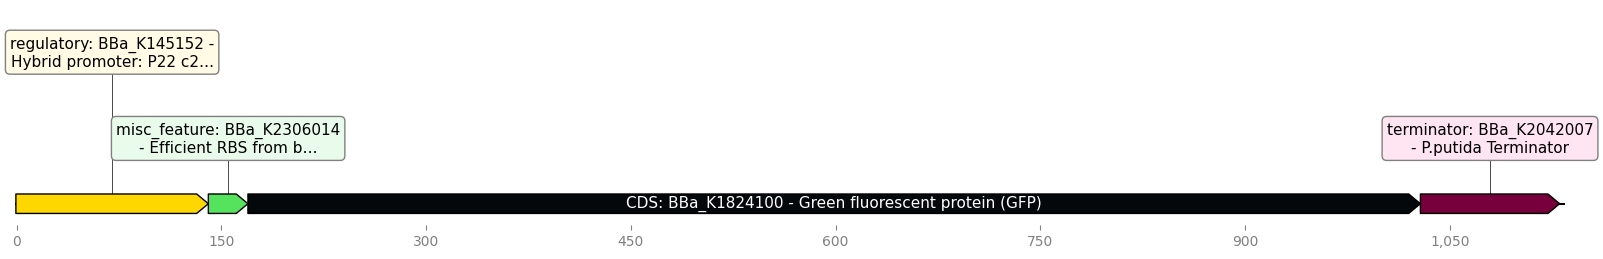

In [ ]:
# @markdown # Genetic Assembly
# @markdown Run this section to plot your sequence

length = []
for i in sequences:
  length.append(len(i))

features = []
ginitio = 0

for i in range(len(names)):
  gfinal =  ginitio + len(sequences[i]) -1
  features= features + [GraphicFeature(start = ginitio,
                            end   = gfinal,
                            strand= +1,
                            color=colors[i],
                            label= str(types[i])+": " + names[i])]
  ginitio = gfinal

if(len(features) != 0):
  record = GraphicRecord(sequence_length=sum(length), features=features)
  ax, _ = record.plot(figure_width=20)
  ax.figure.savefig('assembly.png', bbox_inches='tight')

In [ ]:
# @markdown # .GB file format
# @markdown Your sequence is ready! Run this section to download the .gb file so you can view and work with it in SnapGene

# Block function

def block(type_element, name, pi, pf, col):

  space = " "*(21-len(type_element))

  element = ["    "+ str(type_element)+space+str(pi)+".."+str(pf),
             "                         "+"/label="+  str(name),
             "                         "+"/ApEinfo_revcolor="+ str(col),
             "                         "+"/ApEinfo_fwdcolor="+str(col),
             '']

  for i in element:
    print(i)
    f.write(i + "\n")
  return element

def split10(s1):
  s10 = [(s1[i:i+10]) for i in range(0, len(s1), 10)]
  srow = " ".join(s10)
  return srow

def origin(seq):
  origin_list = []
  s60 = [(seq[i:i+60]) for i in range(0, len(seq), 60)]
  n = 0
  for i in s60:
    index = n*60 + 1
    space_index = str(index) + " "*(5-len(str(index)))
    line = space_index + "  "+  split10(i)
    origin_list.append(line)
    print(line)
    f.write(line + "\n")
    n = n+1

colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

full_seq = "".join(sequences)
full_name_seq = "_".join(names)

head = ["LOCUS"+"     "+full_name_seq+" "+str(len(full_seq))+" bp ds-DNA     linear",
          "DEFINITION",
          "FEATURES                 Location/Qualifiers"]



f= open("assembly.gb","w+")

for i in head:
  print(i)
  f.write(i + "\n")

pinitio = 1 # contador de posicion
for i in range(len(sequences)):

  pfinal =  pinitio + len(sequences[i]) -1
  block(types[i], names[i],pinitio, pfinal, colors[i])
  pinitio = pfinal+1

print("ORIGIN")
f.write("ORIGIN" + "\n")

origin(full_seq)

f.close()
files.download("assembly.gb")

LOCUS     BBa_K145152 - Hybrid promoter: P22 c2 , LacI NOR gate_BBa_K2306014 - Efficient RBS from bacteriophage T7 gene 10 and Shine Dalgarno_BBa_K1824100 - Green fluorescent protein (GFP)_BBa_K2042007 - P.putida Terminator 1135 bp ds-DNA     linear
DEFINITION
FEATURES                 Location/Qualifiers
    regulatory           1..142
                         /label=BBa_K145152 - Hybrid promoter: P22 c2 , LacI NOR gate
                         /ApEinfo_revcolor=#FFD700
                         /ApEinfo_fwdcolor=#FFD700

    misc_feature         143..172
                         /label=BBa_K2306014 - Efficient RBS from bacteriophage T7 gene 10 and Shine Dalgarno
                         /ApEinfo_revcolor=#55E35E
                         /ApEinfo_fwdcolor=#55E35E

    CDS                  173..1032
                         /label=BBa_K1824100 - Green fluorescent protein (GFP)
                         /ApEinfo_revcolor=#04080B
                         /ApEinfo_fwdcolor=#04080B

    termi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# CRISPR (Gene editing tool)

# User Instructions

1. **Obtain** sgRNA sequences through the following links:
  *   https://chopchop.cbu.uib.no/
  *   https://design.synthego.com/#/
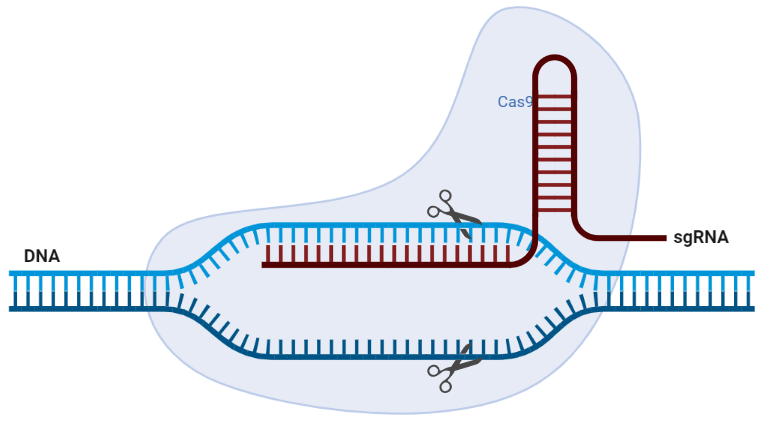

2. **Choose** or type the promoter, gene and terminator for both Cas9 and gRNA assembly
3. **Download** the .gb file which contains the assembled sequence


`CRISPR_Cas9 icon by Marcel Tisch https://twitter.com/MarcelTisch is licensed under CC0 https://creativecommons.org/publicdomain/zero/1.0/`

In [41]:
# @markdown # Run to show widget
# @markdown Select the components and do not forget to press OK


# ------------------------cas9 elements Selection----------------------------------------------------------
#############################################
cas9_promoter_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

cas9_promoter_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)
###############################################

cas9_gene_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_gene_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)
#############################################
cas9_terminator_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_terminator_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)



# ------------------------cas9 customer ----------------------------------------------------------
##########################################
cas9_promoter_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_promoter_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
cas9_promoter_seq_customW = widgets.Text(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)
##########################################
cas9_gene_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_gene_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
cas9_gene_seq_customW = widgets.Text(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)
##########################################
cas9_terminator_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_terminator_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
cas9_terminator_seq_customW = widgets.Text(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)

################################################ cas9 Upload

cas9_promoter_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

cas9_promoter_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)


#-----------------------------------------------------------------------
cas9_gene_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

cas9_gene_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
#-----------------------------------------------------------------------
cas9_terminator_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

cas9_terminator_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)


# ------------------------gRNA-----------------------------
###################################### PROMOTER
gRNA_promoter_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
gRNA_promoter_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)
############################### PROMOTER CUSTOMER
gRNA_promoter_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
gRNA_promoter_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
gRNA_promoter_seq_customW = widgets.Text(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)

############################# gRNA CUSTOMER-------------------------------------
gRNA_element_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)



gRNA_element_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
gRNA_element_seq_customW = widgets.Text(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)

###################################### TERMINATOR
gRNA_terminator_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
gRNA_terminator_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)
############################### TERMINATOR CUSTOMER
gRNA_terminator_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
gRNA_terminator_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
gRNA_terminator_seq_customW = widgets.Text(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)

################################################ gRNA Upload

gRNA_promoter_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

gRNA_promoter_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

#-----------------------------------------------------------------------
gRNA_terminator_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

gRNA_terminator_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

#########################################################
file = open('assembly.png', "rb")
image = file.read()
assemblyW = widgets.Image(
    value= image,
    format='png',
    width=300,
    height=300)

gRNA_file = open('assembly.png', "rb")
gRNA_image = gRNA_file.read()
gRNA_assemblyW = widgets.Image(
    value= gRNA_image,
    format='png',
    width=300,
    height=300)



cas9_promoter_dropdownW.options =  list(d1['eukaryote(plant)']['prom']['fullpro'].keys())
cas9_gene_dropdownW.options = ["Cas9"]
cas9_terminator_dropdownW.options = list(d1['eukaryote(plant)']['term'].keys())

gRNA_promoter_dropdownW.options = list(d1['eukaryote(plant)']['prom']['fullpro'].keys())
gRNA_terminator_dropdownW.options = list(d1['eukaryote(plant)']['term'].keys())




class Element:

    def name(self):
      return self.name

    def sequence(self):
      return self.sequence

    def classification(self):
      return self.classification




#################################################   FUNCTION

def function_crispr(
    cas9_promoter_button,
    cas9_promoter_dropdown,

    cas9_gene_button,
    cas9_gene_dropdown,

    cas9_terminator_button,
    cas9_terminator_dropdown,

    cas9_promoter_button_custom,
    cas9_promoter_name_custom,
    cas9_promoter_seq_custom,

    cas9_gene_button_custom,
    cas9_gene_name_custom,
    cas9_gene_seq_custom,

    cas9_terminator_button_custom,
    cas9_terminator_name_custom,
    cas9_terminator_seq_custom,

    cas9_promoter_upload,
    cas9_promoter_upload_button,
    cas9_gene_upload,
    cas9_gene_upload_button,
    cas9_terminator_upload,
    cas9_terminator_upload_button,


    gRNA_promoter_button,
    gRNA_promoter_dropdown,

    gRNA_promoter_button_custom,
    gRNA_promoter_name_custom,
    gRNA_promoter_seq_custom,


    gRNA_element_button_custom,
    gRNA_element_name_custom,
    gRNA_element_seq_custom,


    gRNA_terminator_button,
    gRNA_terminator_dropdown,

    gRNA_terminator_button_custom,
    gRNA_terminator_name_custom,
    gRNA_terminator_seq_custom,

    gRNA_promoter_upload,
    gRNA_promoter_upload_button,
    gRNA_terminator_upload,
    gRNA_terminator_upload_button):



  cas9_promoter = Element()
  cas9_gene = Element()
  cas9_terminator = Element()

  gRNA_promoter = Element()
  gRNA_element = Element()
  gRNA_terminator = Element()





  # ------------------Promoter cas9--------------------------------------------------
  if cas9_promoter_button == True and cas9_promoter_button_custom == False and cas9_promoter_upload_button == False:
    cas9_promoter.name = cas9_promoter_dropdown
    cas9_promoter.sequence = d1['eukaryote(plant)']['prom']['fullpro'][cas9_promoter_dropdown]
    cas9_promoter.classification = 'regulatory'


  elif cas9_promoter_button == False and cas9_promoter_button_custom == True and cas9_promoter_upload_button == False:
    cas9_promoter.name = cas9_promoter_name_custom
    cas9_promoter.sequence = cas9_promoter_seq_custom
    cas9_promoter.classification = 'regulatory'

  elif cas9_promoter_button == True and cas9_promoter_button_custom == False and cas9_promoter_upload_button == True:
    a,b = fasta_read(cas9_promoter_uploadW)
    cas9_promoter.name = a
    cas9_promoter.sequence = b
    cas9_promoter.classification = 'regulatory'
  else:
    cas9_promoter.name = ""
    cas9_promoter.sequence = ""
    cas9_promoter.classification = ""



  # ------------------Gene cas9--------------------------------------------------

  if cas9_gene_button == True and cas9_gene_button_custom == False and cas9_gene_upload_button == False:
    cas9_gene.name = cas9_gene_dropdown
    cas9_gene.sequence = "ATGGATAAGAAGTATTCTATTGGACTTGATATTGGAACTAATTCTGTTGGATGGGCTGTTATTACTGATGAATATAAGGTTCCTTCTAAGAAGTTTAAGGTTCTTGGAAATACTGATAGACATTCTATTAAGAAGAATCTTATTGGAGCTCTTCTTTTTGATTCTGGAGAAACTGCTGAAGCTACTAGACTTAAGAGAACTGCTAGAAGAAGATATACTAGAAGAAAGAATAGAATTTGTTATCTTCAAGAAATTTTTTCTAATGAAATGGCTAAGGTTGATGATTCTTTTTTTCATAGACTTGAAGAATCTTTTCTTGTTGAAGAAGATAAGAAGCATGAAAGACATCCTATTTTTGGAAATATTGTTGATGAAGTTGCTTATCATGAAAAGTATCCTACTATTTATCATCTTAGAAAGAAGCTTGTTGATTCTACTGATAAGGCTGATCTTAGACTTATTTATCTTGCTCTTGCTCATATGATTAAGTTTAGAGGACATTTTCTTATTGAAGGAGATCTTAATCCTGATAATTCTGATGTTGATAAGCTTTTTATTCAACTTGTTCAAACTTATAATCAACTTTTTGAAGAAAATCCTATTAATGCTTCTGGAGTTGATGCTAAGGCTATTCTTTCTGCTAGACTTTCTAAGTCTAGAAGACTTGAAAATCTTATTGCTCAACTTCCTGGAGAAAAGAAGAATGGACTTTTTGGAAATCTTATTGCTCTTTCTCTTGGACTTACTCCTAATTTTAAGTCTAATTTTGATCTTGCTGAAGATGCTAAGCTTCAACTTTCTAAGGATACTTATGATGATGATCTTGATAATCTTCTTGCTCAAATTGGAGATCAATATGCTGATCTTTTTCTTGCTGCTAAGAATCTTTCTGATGCTATTCTTCTTTCTGATATTCTTAGAGTTAATACTGAAATTACTAAGGCTCCTCTTTCTGCTTCTATGATTAAGAGATATGATGAACATCATCAAGATCTTACTCTTCTTAAGGCTCTTGTTAGACAACAACTTCCTGAAAAGTATAAGGAAATTTTTTTTGATCAATCTAAGAATGGATATGCTGGATATATTGATGGAGGAGCTTCTCAAGAAGAATTTTATAAGTTTATTAAGCCTATTCTTGAAAAGATGGATGGAACTGAAGAACTTCTTGTTAAGCTTAATAGAGAAGATCTTCTTAGAAAGCAAAGAACTTTTGATAATGGATCTATTCCTCATCAAATTCATCTTGGAGAACTTCATGCTATTCTTAGAAGACAAGAAGATTTTTATCCTTTTCTTAAGGATAATAGAGAAAAGATTGAAAAGATTCTTACTTTTAGAATTCCTTATTATGTTGGACCTCTTGCTAGAGGAAATTCTAGATTTGCTTGGATGACTAGAAAGTCTGAAGAAACTATTACTCCTTGGAATTTTGAAGAAGTTGTTGATAAGGGAGCTTCTGCTCAATCTTTTATTGAAAGAATGACTAATTTTGATAAGAATCTTCCTAATGAAAAGGTTCTTCCTAAGCATTCTCTTCTTTATGAATATTTTACTGTTTATAATGAACTTACTAAGGTTAAGTATGTTACTGAAGGAATGAGAAAGCCTGCTTTTCTTTCTGGAGAACAAAAGGCTATTGTTGATCTTCTTTTTAAGACTAATAGAAAGGTTACTGTTAAGCAACTTAAGGAAGATTATTTTAAGAAGATTGAATGTTTTGATTCTGTTGAAATTTCTGGAGTTGAAGATAGATTTAATGCTTCTCTTGGAACTTATCATGATCTTCTTAAGATTATTAAGGATAAGGATTTTCTTGATAATGAAGAAAATGAAGATATTCTTGAAGATATTGTTCTTACTCTTACTCTTTTTGAAGATAGAGAAATGATTGAAGAAAGACTTAAGACTTATGCTCATCTTTTTGATGATAAGGTTATGAAGCAACTTAAGAGAAGAAGATATACTGGATGGGGAAGACTTTCTAGAAAGCTTATTAATGGAATTAGAGATAAGCAATCTGGAAAGACTATTCTTGATTTTCTTAAGTCTGATGGATTTGCTAATAGAAATTTTATGCAACTTATTCATGATGATTCTCTTACTTTTAAGGAAGATATTCAAAAGGCTCAAGTTTCTGGACAAGGAGATTCTCTTCATGAACATATTGCTAATCTTGCTGGATCTCCTGCTATTAAGAAGGGAATTCTTCAAACTGTTAAGGTTGTTGATGAACTTGTTAAGGTTATGGGAAGACATAAGCCTGAAAATATTGTTATTGAAATGGCTAGAGAAAATCAAACTACTCAAAAGGGACAAAAGAATTCTAGAGAAAGAATGAAGAGAATTGAAGAAGGAATTAAGGAACTTGGATCTCAAATTCTTAAGGAACATCCTGTTGAAAATACTCAACTTCAAAATGAAAAGCTTTATCTTTATTATCTTCAAAATGGAAGAGATATGTATGTTGATCAAGAACTTGATATTAATAGACTTTCTGATTATGATGTTGATCATATTGTTCCTCAATCTTTTCTTAAGGATGATTCTATTGATAATAAGGTTCTTACTAGATCTGATAAGAATAGAGGAAAGTCTGATAATGTTCCTTCTGAAGAAGTTGTTAAGAAGATGAAGAATTATTGGAGACAACTTCTTAATGCTAAGCTTATTACTCAAAGAAAGTTTGATAATCTTACTAAGGCTGAAAGAGGAGGACTTTCTGAACTTGATAAGGCTGGATTTATTAAGAGACAACTTGTTGAAACTAGACAAATTACTAAGCATGTTGCTCAAATTCTTGATTCTAGAATGAATACTAAGTATGATGAAAATGATAAGCTTATTAGAGAAGTTAAGGTTATTACTCTTAAGTCTAAGCTTGTTTCTGATTTTAGAAAGGATTTTCAATTTTATAAGGTTAGAGAAATTAATAATTATCATCATGCTCATGATGCTTATCTTAATGCTGTTGTTGGAACTGCTCTTATTAAGAAGTATCCTAAGCTTGAATCTGAATTTGTTTATGGAGATTATAAGGTTTATGATGTTAGAAAGATGATTGCTAAGTCTGAACAAGAAATTGGAAAGGCTACTGCTAAGTATTTTTTTTATTCTAATATTATGAATTTTTTTAAGACTGAAATTACTCTTGCTAATGGAGAAATTAGAAAGAGACCTCTTATTGAAACTAATGGAGAAACTGGAGAAATTGTTTGGGATAAGGGAAGAGATTTTGCTACTGTTAGAAAGGTTCTTTCTATGCCTCAAGTTAATATTGTTAAGAAGACTGAAGTTCAAACTGGAGGATTTTCTAAGGAATCTATTCTTCCTAAGAGAAATTCTGATAAGCTTATTGCTAGAAAGAAGGATTGGGATCCTAAGAAGTATGGAGGATTTGATTCTCCTACTGTTGCTTATTCTGTTCTTGTTGTTGCTAAGGTTGAAAAGGGAAAGTCTAAGAAGCTTAAGTCTGTTAAGGAACTTCTTGGAATTACTATTATGGAAAGATCTTCTTTTGAAAAGAATCCTATTGATTTTCTTGAAGCTAAGGGATATAAGGAAGTTAAGAAGGATCTTATTATTAAGCTTCCTAAGTATTCTCTTTTTGAACTTGAAAATGGAAGAAAGAGAATGCTTGCTTCTGCTGGAGAACTTCAAAAGGGAAATGAACTTGCTCTTCCTTCTAAGTATGTTAATTTTCTTTATCTTGCTTCTCATTATGAAAAGCTTAAGGGATCTCCTGAAGATAATGAACAAAAGCAACTTTTTGTTGAACAACATAAGCATTATCTTGATGAAATTATTGAACAAATTTCTGAATTTTCTAAGAGAGTTATTCTTGCTGATGCTAATCTTGATAAGGTTCTTTCTGCTTATAATAAGCATAGAGATAAGCCTATTAGAGAACAAGCTGAAAATATTATTCATCTTTTTACTCTTACTAATCTTGGAGCTCCTGCTGCTTTTAAGTATTTTGATACTACTATTGATAGAAAGAGATATACTTCTACTAAGGAAGTTCTTGATGCTACTCTTATTCATCAATCTATTACTGGACTTTATGAAACTAGAATTGATCTTTCTCAACTTGGAGGAGATTCTAGAGCTGATCCTAAGAAGAAGAGAAAGGTT"
    cas9_gene.classification = 'CDS'


  elif cas9_gene_button == False and cas9_gene_button_custom == True and cas9_gene_upload_button == False:
    cas9_gene.name = cas9_gene_name_custom
    cas9_gene.sequence = cas9_gene_seq_custom
    cas9_gene.classification = 'CDS'

  elif cas9_gene_button == False and cas9_gene_button_custom == False and cas9_gene_upload_button == True:
    c,d = fasta_read(cas9_gene_uploadW)
    cas9_gene.name = c
    cas9_gene.sequence = d
    cas9_gene.classification = 'CDS'


  else:
    cas9_gene.name = ""
    cas9_gene.sequence = ""
    cas9_gene.classification = ''


  # ------------------Terminator cas9--------------------------------------------------
  if cas9_terminator_button == True and cas9_terminator_button_custom == False and cas9_terminator_upload_button==False:
    cas9_terminator.name = cas9_terminator_dropdown
    cas9_terminator.sequence = d1['eukaryote(plant)']['term'][cas9_terminator_dropdown]
    cas9_terminator.classification = 'terminator'


  elif cas9_terminator_button == False and cas9_terminator_button_custom == True and cas9_terminator_upload_button==False:

    cas9_terminator.name = cas9_terminator_name_custom
    cas9_terminator.sequence = cas9_terminator_seq_custom
    cas9_terminator.classification = 'terminator'

  elif cas9_terminator_button == False and cas9_terminator_button_custom == False and cas9_terminator_upload_button==True:
    e,f = fasta_read(cas9_terminator_uploadW)
    cas9_terminator.name = e
    cas9_terminator.sequence = f
    cas9_terminator.classification = 'terminator'

  else:
    cas9_terminator.name = ""
    cas9_terminator.sequence = ""
    cas9_terminator.classification = ''

  scaffold_seq = d1['eukaryote(plant)']['other']['scaffold']

###################################################################################

  # ------------------Promoter gRNA--------------------------------------------------

  if gRNA_promoter_button == True and gRNA_promoter_button_custom == False and gRNA_promoter_upload_button==False:
    gRNA_promoter.name = gRNA_promoter_dropdown
    gRNA_promoter.sequence = d1['eukaryote(plant)']['prom']['fullpro'][gRNA_promoter_dropdown]
    gRNA_promoter.classification = 'regulatory'


  elif gRNA_promoter_button == False and gRNA_promoter_button_custom == True and gRNA_promoter_upload_button==False:

    gRNA_promoter.name = gRNA_promoter_name_custom
    gRNA_promoter.sequence = gRNA_promoter_seq_custom
    gRNA_promoter.classification = 'regulatory'

  elif gRNA_promoter_button == False and gRNA_promoter_button_custom == False and gRNA_promoter_upload_button==True:
    g, h = fasta_read(gRNA_promoter_uploadW)
    gRNA_promoter.name = g
    gRNA_promoter.sequence = h
    gRNA_promoter.classification = 'regulatory'

  else:
    gRNA_promoter.name = ""
    gRNA_promoter.sequence = ""
    gRNA_promoter.classification = ''


  # ------------------Element gRNA--------------------------------------------------

  if gRNA_element_button_custom ==  True:
    gRNA_element.name = gRNA_element_name_custom
    gRNA_element.sequence = gRNA_element_seq_custom
    gRNA_element.classification = 'gRNA'

  else:
    gRNA_element.name = ""
    gRNA_element.sequence = ""
    gRNA_element.classification = ''


  # ------------------Terminator gRNA--------------------------------------------------

  if gRNA_terminator_button == True and gRNA_terminator_button_custom == False and gRNA_terminator_upload_button==False:
    gRNA_terminator.name = gRNA_terminator_dropdown
    gRNA_terminator.sequence = d1['eukaryote(plant)']['term'][gRNA_terminator_dropdown]
    gRNA_terminator.classification = 'terminator'


  elif gRNA_terminator_button == False and gRNA_terminator_button_custom == True and gRNA_terminator_upload_button==False:

    gRNA_terminator.name = gRNA_terminator_name_custom
    gRNA_terminator.sequence = gRNA_terminator_seq_custom
    gRNA_terminator.classification = 'terminator'

  elif gRNA_terminator_button == False and gRNA_terminator_button_custom == False and gRNA_terminator_upload_button== True:

    j, k= fasta_read(gRNA_terminator_uploadW)
    gRNA_terminator.name = j
    gRNA_terminator.sequence = k
    gRNA_terminator.classification = 'terminator'

  else:
    gRNA_terminator.name = ""
    gRNA_terminator.sequence = ""
    gRNA_terminator.classification = ''

  # Assembly Cas9 Cassette

  name = [cas9_promoter.name, cas9_gene.name, cas9_terminator.name]
  seq = [cas9_promoter.sequence, cas9_gene.sequence, cas9_terminator.sequence]
  btype = [cas9_promoter.classification , cas9_gene.classification, cas9_terminator.classification]
  colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']


  name_gRNA = [gRNA_promoter.name, gRNA_element.name, gRNA_terminator.name]
  seq_gRNA = [gRNA_promoter.sequence, gRNA_element.sequence, gRNA_terminator.sequence]
  btype_gRNA = [gRNA_promoter.classification , gRNA_element.classification, gRNA_terminator.classification]

  return   name, seq, btype , name_gRNA, seq_gRNA, btype_gRNA




####### Widget

from ipywidgets import Button, Layout

cas9_promoter_title = widgets.HTML(
    value="<b>Promoter</b>",
    placeholder='Personalized gene',
    description=''
)


cas9_promoter_html = widgets.HTML(
    value="Select a <b>promoter element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

cas9_promoter_html_customer = widgets.HTML(
    value="Insert your <b>promoter element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)



cas9_gene_title = widgets.HTML(
    value="<b>Cas gene</b>",
    placeholder='Personalized gene',
    description='',
)


cas9_gene_html = widgets.HTML(
    value="Select a <b>gene element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

cas9_gene_html_customer = widgets.HTML(
    value="Insert your <b>gene element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)



cas9_terminator_title = widgets.HTML(
    value="<b>Terminator</b>",
    placeholder='Personalized gene',
    description='',
)

cas9_terminator_html = widgets.HTML(
    value="Select a <b>terminator element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

cas9_terminator_html_customer = widgets.HTML(
    value="Insert your <b>terminator element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)



# html upload cas9
cas9_promoter_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with promoter sequence:",
    placeholder='Personalized promoter',
    description='',
)

cas9_gene_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with with gene sequence",
    placeholder='Personalized promoter',
    description='',
)

cas9_terminator_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with terminator",
    placeholder='Personalized promoter',
    description='',
)



######

gRNA_promoter_title = widgets.HTML(
    value="<b>Promoter</b>",
    placeholder='Personalized gene',
    description=''
)

gRNA_promoter_html = widgets.HTML(
    value="Select a <b>promoter element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

gRNA_promoter_html_customer = widgets.HTML(
    value="Insert your <b>promoter element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)


gRNA_element_title = widgets.HTML(
    value="<b>Single-guide RNA (sgRNA)</b>",
    placeholder='Personalized gene',
    description=''
)

gRNA_element_html = widgets.HTML(
    value="Insert the <b>sgRNA element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)



gRNA_terminator_title = widgets.HTML(
    value="<b>Terminator</b>",
    placeholder='Personalized gene',
    description=''
)
gRNA_terminator_html = widgets.HTML(
    value="Select a <b>terminator element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

gRNA_terminator_html_customer = widgets.HTML(
    value="Insert your <b>terminator element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)


#-- html gRNA upload
gRNA_promoter_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with promoter sequence:",
    placeholder='Personalized promoter',
    description='',
)

gRNA_terminator_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with terminator",
    placeholder='Personalized promoter',
    description='',
)


cas9_promoter_html_upload
cas9_gene_html_upload
cas9_terminator_html_upload

gRNA_promoter_html_upload
gRNA_terminator_html_upload

cas9_assembly = VBox ([cas9_promoter_title ,

                       cas9_promoter_html,
                       HBox([cas9_promoter_dropdownW, cas9_promoter_buttonW]),

                       cas9_promoter_html_customer,
                       HBox([cas9_promoter_name_customW,  cas9_promoter_seq_customW, cas9_promoter_button_customW]),

                       cas9_promoter_html_upload,
                       HBox([cas9_promoter_uploadW, cas9_promoter_upload_buttonW],
                            layout=Layout( height='80px')),


                       cas9_gene_title ,

                       cas9_gene_html,
                       HBox([cas9_gene_dropdownW,cas9_gene_buttonW]),

                       cas9_gene_html_customer,
                       HBox([cas9_gene_name_customW, cas9_gene_seq_customW, cas9_gene_button_customW]),

                       cas9_gene_html_upload,
                       HBox([cas9_gene_uploadW, cas9_gene_upload_buttonW ],
                            layout=Layout( height='80px')),

                       cas9_terminator_title ,

                       cas9_terminator_html,
                       HBox([cas9_terminator_dropdownW, cas9_terminator_buttonW]),

                       cas9_terminator_html_customer,
                       HBox([cas9_terminator_name_customW,    cas9_terminator_seq_customW, cas9_terminator_button_customW]),

                       cas9_terminator_html_upload,
                       HBox([cas9_terminator_uploadW, cas9_terminator_upload_buttonW],
                            layout=Layout( height='80px'))
                       ])

gRNA_assembly = VBox ([gRNA_promoter_title,
                       gRNA_promoter_html,
                       HBox([gRNA_promoter_dropdownW, gRNA_promoter_buttonW]),
                       gRNA_promoter_html_customer,
                       HBox([gRNA_promoter_name_customW,  gRNA_promoter_seq_customW, gRNA_promoter_button_customW]),
                       gRNA_promoter_html_upload,
                       HBox([gRNA_promoter_uploadW, gRNA_promoter_upload_buttonW],
                            layout=Layout( height='80px')),

                       gRNA_element_title,
                       gRNA_element_html,
                       HBox([gRNA_element_name_customW, gRNA_element_seq_customW, gRNA_element_button_customW],
                            layout=Layout( height='80px')),

                       gRNA_terminator_title,
                       gRNA_terminator_html,
                       HBox([gRNA_terminator_dropdownW, gRNA_terminator_buttonW]),
                       gRNA_terminator_html_customer,
                       HBox([gRNA_terminator_name_customW,    gRNA_terminator_seq_customW, gRNA_terminator_button_customW]),
                       gRNA_terminator_html_upload,
                       HBox([gRNA_terminator_uploadW, gRNA_terminator_upload_buttonW],
                            layout=Layout( height='80px')),
                       ])



crispr = widgets.interactive(    function_crispr,
    cas9_promoter_button = cas9_promoter_buttonW,
    cas9_promoter_dropdown = cas9_promoter_dropdownW,

    cas9_gene_button = cas9_gene_buttonW,
    cas9_gene_dropdown = cas9_gene_dropdownW,

    cas9_terminator_button = cas9_terminator_buttonW,
    cas9_terminator_dropdown  = cas9_terminator_dropdownW,

    cas9_promoter_button_custom = cas9_promoter_button_customW,
    cas9_promoter_name_custom = cas9_promoter_name_customW,
    cas9_promoter_seq_custom = cas9_promoter_seq_customW,

    cas9_gene_button_custom = cas9_gene_button_customW,
    cas9_gene_name_custom = cas9_gene_name_customW,
    cas9_gene_seq_custom  = cas9_gene_seq_customW  ,

    cas9_terminator_button_custom = cas9_terminator_button_customW,
    cas9_terminator_name_custom = cas9_terminator_name_customW,
    cas9_terminator_seq_custom  = cas9_terminator_seq_customW,

    cas9_promoter_upload = cas9_promoter_uploadW,
    cas9_promoter_upload_button = cas9_promoter_upload_buttonW,
    cas9_gene_upload =cas9_gene_uploadW,
    cas9_gene_upload_button = cas9_gene_upload_buttonW,
    cas9_terminator_upload = cas9_terminator_uploadW,
    cas9_terminator_upload_button = cas9_terminator_upload_buttonW,

    gRNA_promoter_button = gRNA_promoter_buttonW,
    gRNA_promoter_dropdown = gRNA_promoter_dropdownW,

    gRNA_promoter_button_custom = gRNA_promoter_button_customW,
    gRNA_promoter_name_custom = gRNA_promoter_name_customW,
    gRNA_promoter_seq_custom = gRNA_promoter_seq_customW,


    gRNA_element_button_custom = gRNA_element_button_customW,
    gRNA_element_name_custom = gRNA_element_name_customW,
    gRNA_element_seq_custom = gRNA_element_seq_customW,

    gRNA_terminator_button = gRNA_terminator_buttonW,
    gRNA_terminator_dropdown = gRNA_terminator_dropdownW,

    gRNA_terminator_button_custom = gRNA_terminator_button_customW,
    gRNA_terminator_name_custom = gRNA_terminator_name_customW ,
    gRNA_terminator_seq_custom = gRNA_terminator_seq_customW,

    gRNA_promoter_upload = gRNA_promoter_uploadW,
    gRNA_promoter_upload_button = gRNA_promoter_upload_buttonW,
    gRNA_terminator_upload = gRNA_terminator_uploadW,
    gRNA_terminator_upload_button = gRNA_terminator_upload_buttonW

    )



# Creation to visualizase
tab_nest = widgets.Tab()
tab_nest.children = [cas9_assembly ,gRNA_assembly]
tab_nest.set_title(0, 'Cas9 Assembly')
tab_nest.set_title(1, 'gRNA Assembly')



assemblyW_html = widgets.HTML(
    value="<b>Cas9 assembly plot:</b>",
    placeholder='Personalized gene',
    description='',
)

gRNA_assemblyW_html = widgets.HTML(
    value="<b>gRNA assembly plot:</b>",
    placeholder='Personalized gene',
    description='',
)

tab_nest




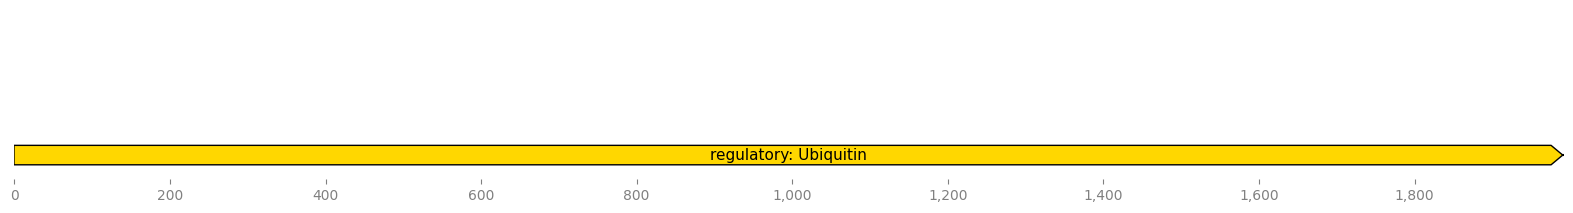

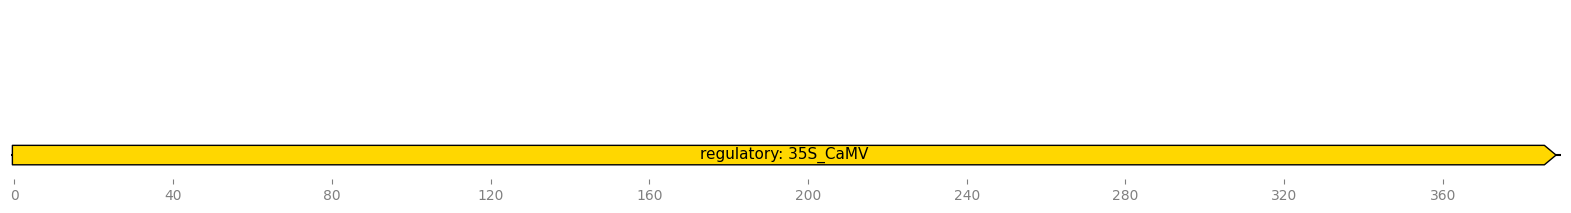

In [45]:
names = [x for x in crispr.result[0] if x.strip()]
seq = [x for x in crispr.result[1] if x.strip()]
btypes = [x for x in crispr.result[2] if x.strip()]

name_gRNA = [x for x in crispr.result[3] if x.strip()]
seq_gRNA = [x for x in crispr.result[4] if x.strip()]
btypes_gRNA = [x for x in crispr.result[5] if x.strip()]

colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']
length = []
ginitio = 0
features = []

for i in seq:
  length.append(len(i))

for i in range(len(names)):
  gfinal =  ginitio + len(seq[i]) -1
  features= features + [GraphicFeature(start = ginitio,
                            end   = gfinal,
                            strand= +1,
                            color=colors[i],
                            label= str(btypes[i])+": " + names[i])]
  ginitio = gfinal

record = GraphicRecord(sequence_length=sum(length), features=features)
ax, _ = record.plot(figure_width=20)
ax.figure.savefig('cas9_assembly.png', bbox_inches='tight')

gRNA_length = []
ginitio = 0
gRNA_features = []


for i in seq_gRNA:
  gRNA_length.append(len(i))

for i in range(len(name_gRNA)):
  gfinal =  ginitio + len(seq_gRNA[i]) -1
  gRNA_features= gRNA_features + [GraphicFeature(start = ginitio,
                            end   = gfinal,
                            strand= +1,
                            color=colors[i],
                            label= str(btypes_gRNA[i])+": " + name_gRNA[i])]
  ginitio = gfinal

gRNA_record = GraphicRecord(sequence_length=sum(gRNA_length), features=gRNA_features)
gRNA_ax, _ = gRNA_record.plot(figure_width=20)
gRNA_ax.figure.savefig('gRNA_assembly.png', bbox_inches='tight')


In [ ]:
# @markdown # .GB file format
# @markdown Your sequence is ready! Copy this text and save it in a .gb file so you can view and work with it in SnapGene

cas9_promoter = crispr.result[0]
cas9_gene= crispr.result[1]
cas9_terminator = crispr.result[2]
gRNA_promoter = crispr.result[3]
gRNA_element = crispr.result[4]
gRNA_terminator = crispr.result[5]

name_cas9 = [cas9_promoter.name, cas9_gene.name, cas9_terminator.name]
seq_cas9 = [cas9_promoter.sequence, cas9_gene.sequence, cas9_terminator.sequence]
btype_cas9 = [cas9_promoter.classification , cas9_gene.classification, cas9_terminator.classification]
colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']


name_gRNA = [gRNA_promoter.name, gRNA_element.name, gRNA_terminator.name]
seq_gRNA = [gRNA_promoter.sequence, gRNA_element.sequence, gRNA_terminator.sequence]
btype_gRNA = [gRNA_promoter.classification , gRNA_element.classification, gRNA_terminator.classification]
colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

name_crispr = name_cas9 + name_gRNA
dna_crispr = seq_cas9 + seq_gRNA
type_crispr = btype_cas9 + btype_gRNA



def block(type_element, name, pi, pf, col):

  space = " "*(21-len(type_element))

  element = ["    "+ str(type_element)+space+str(pi)+".."+str(pf),
             "                         "+"/label="+  str(name),
             "                         "+"/ApEinfo_revcolor="+ str(col),
             "                         "+"/ApEinfo_fwdcolor="+str(col),
             '']

  for i in element:
    print(i)
    file_crispr.write(i + "\n")
  return element

# Function

def split10(s1):
  s10 = [(s1[i:i+10]) for i in range(0, len(s1), 10)]
  srow = " ".join(s10)
  return srow

def origin(seq):

  origin_list = []
  s60 = [(seq[i:i+60]) for i in range(0, len(seq), 60)]

  n = 0
  for i in s60:
    index = n*60 + 1
    space_index = str(index) + " "*(5-len(str(index)))

    line = space_index + "  "+  split10(i)

    origin_list.append(line)
    print(line)
    file_crispr.write(line + "\n")
    n = n+1



colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

full_seq = "".join(dna_crispr)
full_name_seq = "_".join(name_crispr)

head = ["LOCUS"+"     "+full_name_seq+" "+str(len(full_seq))+" bp ds-DNA     linear",
          "DEFINITION",
          "FEATURES                 Location/Qualifiers"]



file_crispr= open(str(full_name_seq)+".gb","w+")

for i in head:
  print(i)
  file_crispr.write(i + "\n")

pinitio = 1 # contador de posicion
for i in range(len(dna_crispr)):

  pfinal =  pinitio + len(dna_crispr[i]) -1
  block(type_crispr[i], name_crispr[i],pinitio, pfinal, colors[i])
  pinitio = pfinal+1

print("ORIGIN")
file_crispr.write("ORIGIN" + "\n")

origin(full_seq)

file_crispr.close()
files.download(str(full_name_seq)+".gb")


LOCUS     Ubc Promoter_Cas9_35S_CaMV_ter_35S_CaMV_Example_35S_CaMV_ter 6187 bp ds-DNA     linear
DEFINITION
FEATURES                 Location/Qualifiers
    regulatory           1..1219
                         /label=Ubc Promoter
                         /ApEinfo_revcolor=#FFD700
                         /ApEinfo_fwdcolor=#FFD700

    CDS                  1220..5353
                         /label=Cas9
                         /ApEinfo_revcolor=#55E35E
                         /ApEinfo_fwdcolor=#55E35E

    terminator           5354..5570
                         /label=35S_CaMV_ter
                         /ApEinfo_revcolor=#04080B
                         /ApEinfo_fwdcolor=#04080B

    regulatory           5571..5960
                         /label=35S_CaMV
                         /ApEinfo_revcolor=#77003C
                         /ApEinfo_fwdcolor=#77003C

    gRNA                 5961..5970
                         /label=Example
                         /ApEinfo_revcolor=#0ED0E1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
features

NameError: ignored

In [ ]:
gRNA_features

NameError: ignored